In [9]:
### Deep layered Neural Network 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from deep_layered_NN import *

In [11]:
# importing datasets
file_pth1='./dataset/train_catvnoncat.h5'
file_pth2='./dataset/test_catvnoncat.h5'
def load_dataset(file_pth1,file_pth2):
    train_dataset = h5py.File(file_pth1, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) #  train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) #  train set labels

    test_dataset = h5py.File(file_pth2, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) #  test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) #  test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset(file_pth1,file_pth2)

y = [1], it's a 'cat' picture.


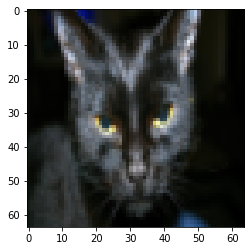

In [12]:
## visualization of data
index = 25
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[:, index]) + ", it's a '" + classes[np.squeeze(train_y[:, index])].decode("utf-8") +  "' picture.")

In [13]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))


Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [14]:

train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [51]:
import numpy as np

# Activation functions
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    assert A.shape==Z.shape
    return A

def relu(Z):
    A = np.maximum(0, Z)
    assert A.shape==Z.shape
    return A

def tanh_f(Z):
    A=np.tanh(Z)
    assert A.shape==Z.shape
    return A

#derivatives of activation functions
def relu_der(dA, cache):
    Z = cache
    #print(Z)
    dZ = np.array(dA, copy=True) 
    #print(dZ)
    assert (dZ.shape == Z.shape)
    dZ[Z <= 0] = 0
    return dZ

def sigmoid_der(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ


def tanh_der(dA, cache):
    Z = cache
    s = 1-(tanh_f(Z)**2)
    dZ = dA * s 
    assert dA.shape==dZ.shape
    return dZ

def hypothesis(X,W,b):
    h=np.dot(W,X)+b
    return h

def cost_function(A,Y):
    m=Y.size
    cost = -np.sum(np.multiply(Y, np.log(A)) +np.multiply((1-Y), np.log(1-A)))/m
    return float(np.squeeze(cost))

def ln_act_fun(X,parameters,l,activation):
    w=parameters['w'+str(l)]
    b=parameters['b'+str(l)]
    Z=hypothesis(X,w,b)
    ln_cache=(X,w,b)
    if activation=='sigmoid':
        A= sigmoid(Z)
        cache = (ln_cache, Z)
        return A,cache
    if activation=='relu':
        A= relu(Z)
        cache = (ln_cache, Z)
        return A,cache
    if activation=='tanh':
        A=tanh_f(Z)
        cache = (ln_cache, Z)
        return A,cache

def foward_propagation_deep(X,parameters):
    fw_cache=[]
    layers=int(len(parameters)/2)
    #hidden layers
    A=X
    for i in range(1, layers):
        #print(i)
        A_p = A
        A, cache = ln_act_fun(A_p, parameters, i, activation='relu')
        #print(cache)
        fw_cache.append(cache)
    #output layer activation function    
    AL, cache = ln_act_fun(A, parameters, layers, activation='sigmoid')
    fw_cache.append(cache)
    #print(cache[-1])
    #print('fw_cache',fw_cache)
    return AL,fw_cache


def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = np.dot(dZ, A_prev.T)/m
    db = np.sum(dZ, axis=1, keepdims=True)/m
    dA_prev = np.dot(W.T, dZ)
    return dA_prev, dW, db


def bw_act_fun(dA, cache, activation):
    linear_cache, activation_cache = cache
    #print('linear_cache',linear_cache)
    if activation == "relu":
        dZ = relu_der(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        return dA_prev, dW, db
        
    elif activation == "sigmoid":
        dZ = sigmoid_der(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        return dA_prev, dW, db

    elif activation == "tanh":
        dZ = tanh_der(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        return dA_prev, dW, db

def back_propagation_deep(AL, Y, caches):
    grads= {}
    Layers= len(caches) 
    #print(Layers)
    m= AL.shape[1]
    Y= Y.reshape(AL.shape) 
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    current_cache= caches[-1]
    dA_prev_temp, dW_temp, db_temp = bw_act_fun(dAL, current_cache, activation="sigmoid")
    grads["dA" + str(Layers-1)]= dA_prev_temp
    grads["dw" + str(Layers)]= dW_temp
    grads["db" + str(Layers)] = db_temp
    print(current_cache)
    for i in reversed(range(Layers-1)):
        print(i)
        current_cache = caches[i]
        print(current_cache)
        dA_prev_temp, dW_temp, db_temp= bw_act_fun(dAL, current_cache, activation="relu")
        grads["dA" + str(i)] = dA_prev_temp
        grads["dw" + str(i+1)] = dW_temp
        grads["db" + str(i+1)]= db_temp
    return grads


def deep_layer_NN(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    
    np.random.seed(1)
    costs = [] 
    parameters={}
    L = len(layers_dims) 
    #initializing random initial parameter
    for k in range(1, L):
        parameters['w'+str(k)] = np.random.randn(layers_dims[k], layers_dims[k-1])*0.01
        parameters['b'+str(k)] = np.zeros((layers_dims[k], 1))
    #print(parameters)
    # performing gradient descent
    for i in range(0, num_iterations):
        #forward propagation for all layers
        AL, cache = foward_propagation_deep(X, parameters)
    
        cost=cost_function(AL, Y)
        costs.append(cost)
        #print(cost)
        #BAckprogation to find gradients of parameters
        grads=back_propagation_deep(AL, Y, cache)
    
        # updating parameters
        for j in range(L):
            parameters["w" + str(j + 1)] -=  learning_rate * grads["dw" + str(j + 1)]
            parameters["b" + str(j + 1)] -= learning_rate * grads["db" + str(j + 1)]
    
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
   
    return parameters, costs


layers_dims=[12288, 20, 7, 5, 1]
#with 4 hidden layers
parameters, costs = deep_layer_NN(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

((array([[2.25271965e-04, 1.71106341e-04, 1.03988863e-04, ...,
        1.59716332e-04, 0.00000000e+00, 1.50485090e-04],
       [1.75775427e-04, 3.95556010e-05, 2.28282195e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.85549515e-04, 2.51623652e-04, 3.14626359e-04, ...,
        1.62405059e-04, 1.25098896e-04, 1.19502359e-04],
       [3.42814628e-04, 4.62324686e-04, 5.33863583e-04, ...,
        3.57671153e-04, 1.73169670e-04, 2.67352024e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]), array([[-0.00859177, -0.00044166,  0.01119846,  0.02007237,  0.0004181 ]]), array([[0.]])), array([[6.94585473e-06, 1.06101746e-05, 1.33357089e-05, 3.39847862e-06,
        1.57484769e-05, 9.78503668e-06, 6.65918255e-06, 1.91903490e-07,
        7.57296871e-06, 5.29122255e-06, 1.29900573e-05, 1.39995544e-05,
        1.17702042e-05, 1.64560882e-05, 1.07608524e-05, 2.51651015e-05,
        1.05730606e-05, 2.

AssertionError: 